### Example #2

Author : Minjun J. Choi (mjchoi@nfri.re.kr)

We will calculate local cross phase between two data sets.

#### Step #0
Import modules and make an instance

In [8]:
%matplotlib inline 
from fluctana import *

#### Step #1 
Make two data sets to be compared.

One data set has three channel ('ECEI_G1202', 'ECEI_G1203', 'ECEI_G1204').

The other has three channels ('ECEI_G1302', 'ECEI_G1303', 'ECEI_G1304').

In [18]:
A = FluctAna()
A.add_data(KstarEcei(), shot=19348, trange=[8.2, 8.25], clist=['ECEI_G1202-1204'])
A.add_data(KstarEcei(), shot=19348, trange=[8.2, 8.25], clist=['ECEI_G1302-1304'])

data is normalized by trange average
data is normalized by trange average


#### Step #2
Do fft transform with proper option parameters

In [19]:
A.fftbins(nfft=512,window='hann',overlap=0.5,detrend=1)

---- DATA SET # 0 for [8.2, 8.25] s ----
{000:ECEI_G1202} {001:ECEI_G1203} {002:ECEI_G1204} 
---- DATA SET # 1 for [8.2, 8.25] s ----
{000:ECEI_G1302} {001:ECEI_G1303} {002:ECEI_G1304} 
dnum 0 fftbins 95 with hann size 512 overlap 0.5 detrend 1
dnum 1 fftbins 95 with hann size 512 overlap 0.5 detrend 1


The message means that

data set number 0 has three channel and each data is divided into 95 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 512 data points.

data set number 1 has three channels and each data is divided into 95 sections (or bins) with overlap ratio = 0.5. Each section (bin) has 512 data points.

#### Step #3
Calculate cross phase between two data sets.

Set the reference data set (done) as data set number 0. If the reference data set has only one channel, calculations will be done between the one reference channel and all channels in dtwo. Otherwise, done can have same number of channels with dtwo, and calculations between pairs of same channel numbers will be done.

Set dtwo as data set number 1

In [20]:
A.cross_phase(done=0,dtwo=1)

#### Step #4
Plot the result. 

The result is saved for data set number 1 (dtwo)

Plot the result of the channel number 0, 1, 2 (in dtwo=1) in multiple windows

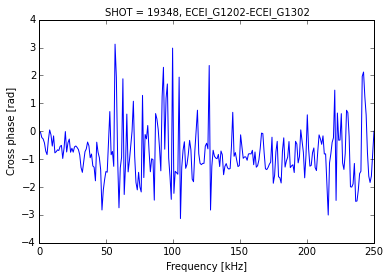

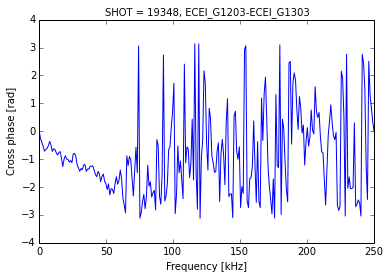

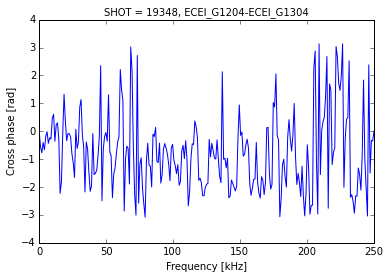

In [21]:
A.mplot(dnum=1,cnum=[0,1,2],type='val')

Plot the result of the channel number 0, 1, 2 (in dtwo=1) in single window (overlapping)

dnum 1 : calculation ECEI_G1202-ECEI_G1302 is plotted
dnum 1 : calculation ECEI_G1203-ECEI_G1303 is plotted
dnum 1 : calculation ECEI_G1204-ECEI_G1304 is plotted


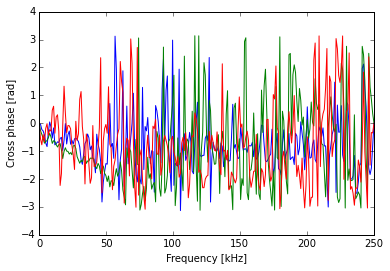

In [22]:
A.oplot(dnum=1,cnum=[0,1,2],type='val')

Plot the rms amplitude image (3 points in this example) by integrating the cross power spectral density over a frequency range

snum : sample channel number

frange : integration frequency range

vlimits : color scale limits

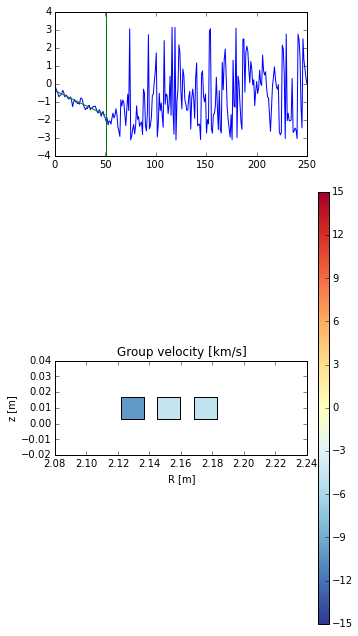

In [23]:
A.cplot(dnum=1,snum=1,frange=[0,50],vlimits=[-15,15])

You can check calculation values as follows

In [24]:
print A.Dlist[1].pdata

[ -4.9147771   -4.66233443 -10.0586947 ]


Channel distances between pairs can be checked as follows

In [25]:
print A.Dlist[1].dist

[ 0.02006826  0.02004983  0.0200318 ]
